<a href="https://colab.research.google.com/github/Anusha-1117/Hunar-Intern/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv("house price data.csv")

# Data Cleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Drop non-numeric or less relevant columns
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

# Features and Target
X = df.drop("price", axis=1)
y = df["price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Original Test Set:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")



Model Performance on Original Test Set:
Mean Squared Error: 986921767056.10
R-squared Score: 0.0323


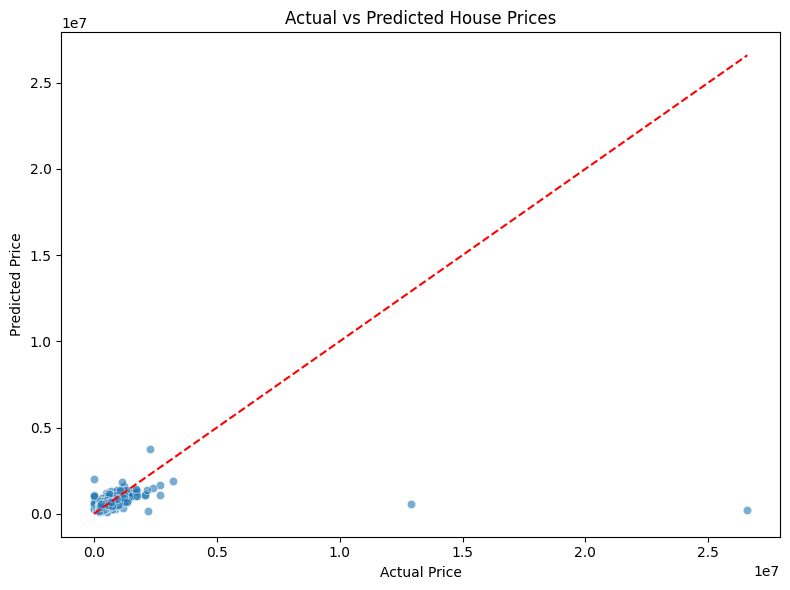


Testing with Different Dataset Splits:

Random State: 10
MSE: 65302537766.85
R-squared: 0.4463

Random State: 20
MSE: 76941959073.31
R-squared: 0.5332

Random State: 30
MSE: 821419905262.07
R-squared: 0.0364


In [4]:
# Visualizing predictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

# Testing with different subsets of the dataset

print("\nTesting with Different Dataset Splits:")

for seed in [10, 20, 30]:
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=seed)
    model.fit(X_train_new, y_train_new)
    y_pred_new = model.predict(X_test_new)
    mse_new = mean_squared_error(y_test_new, y_pred_new)
    r2_new = r2_score(y_test_new, y_pred_new)
    print(f"\nRandom State: {seed}")
    print(f"MSE: {mse_new:.2f}")
    print(f"R-squared: {r2_new:.4f}")
